#Titanic Passenger Survival Prediction

Sneha Malakar

12/13/2021

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/drive/My Drive/HDS/Datasets/Kaggle Titanic/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv('/content/drive/My Drive/HDS/Datasets/Kaggle Titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##Data Cleaning

In [ ]:
#Check to see how many missing data on the training data
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
#Check to see how many missing data on the testing data
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Columns Cabin, Age, and Embarked have missing data on the training set whereas columns Cabin, Age and Fare have missing data on the testing set. 


In [ ]:
# Drop ticket, cabin, and name features from training and test set
train = train.drop(['Ticket', 'Cabin', 'Name'], axis = 1)
test = test.drop(['Ticket', 'Cabin', 'Name'], axis = 1)

####Cleaning on training and test data for Age

In [ ]:
# Fill in missing values with the mean age in both training and test sets
agemean = train["Age"].mean()
train["Age"].fillna(value=agemean, inplace=True)
test["Age"].fillna(value=agemean, inplace=True)

####Cleaning on training data for Embarked

In [ ]:
#Fill in Embarked feature in the training set. 
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [ ]:
#replacing the missing values in the Embarked feature with S
train = train.fillna({"Embarked": "S"})

####Cleaning on testing data for Fare

In [ ]:
# Fill missing value in Fare with median
test['Fare'].fillna(test['Fare'].dropna().median(), inplace = True)

##Data Visualization
To see whether particular features have made a difference in the survival rate. 

####1) Sex Feature

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


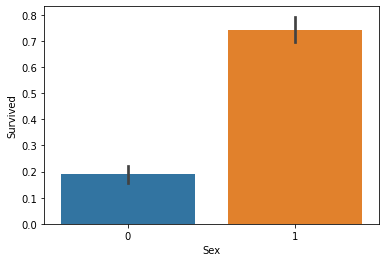

In [ ]:
train["Sex"].replace(["male", "female"], [0, 1], inplace=True)
test["Sex"].replace(["male", "female"], [0, 1], inplace=True)
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 0].value_counts(normalize = True)[1]*100)

Females have a much higher chance of survival than males. Therefore, the sex feature is essential in our prediction.

####2) Pclass Feature

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


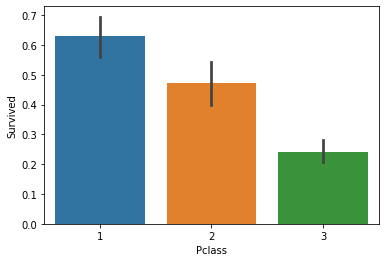

In [ ]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

People with higher socioeconomic class had a higher rate of survival. 

####3) Age Feature

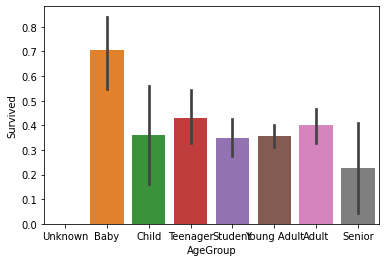

In [ ]:
#sort the ages into logical categories
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

Age group also affects survival rate. As we can see babies were most likely to survive compared to any other age group.

####SibSp Feature

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


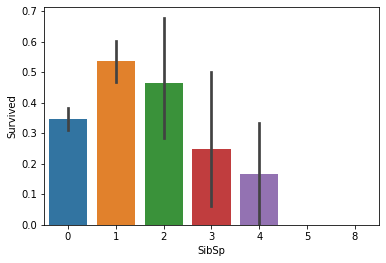

In [ ]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=train)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two.

####Parch feature

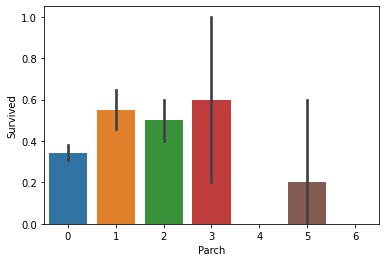

In [ ]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

In [ ]:
# Pull out data subsets for training and testing
features = train.loc[:,["Pclass","Age","SibSp","Parch","Sex"]]
targets = train.loc[:,"Survived"]
test_features = test.loc[:,["Pclass","Age","SibSp","Parch","Sex"]]
features.head()

,Pclass,Age,SibSp,Parch,Sex
0,3,22.0,1,0,0
1,1,38.0,1,0,1
2,3,26.0,0,0,1
3,1,35.0,1,0,1
4,3,35.0,0,0,0


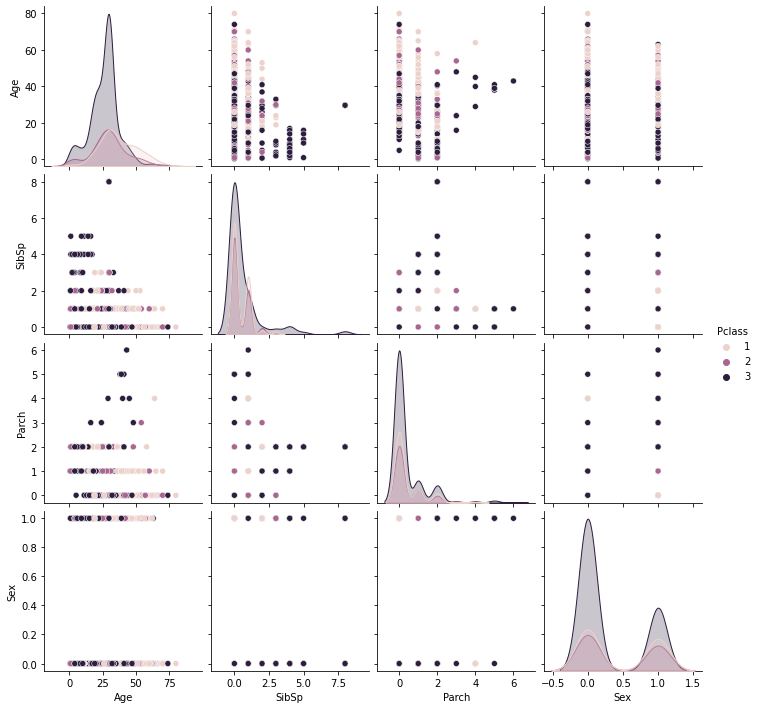

In [ ]:
# Try out a pairplot colored by class
import seaborn as sns
sns.pairplot(features, hue='Pclass')

###Random Forest

In [ ]:
# Train up a random forest model with post pruning
forest = RandomForestClassifier(ccp_alpha=0.01, max_features=3)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.137715
score_time         0.014314
test_accuracy      0.809234
train_accuracy     0.827720
test_precision     0.826505
train_precision    0.840768
test_recall        0.643564
train_recall       0.687056
test_f1            0.717834
train_f1           0.752625
dtype: float64

In [ ]:
# Train up a random forest model with more aggressive post pruning
forest = RandomForestClassifier(ccp_alpha=0.02, max_features=3)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

# Performance is a bit worse

fit_time           0.138571
score_time         0.013444
test_accuracy      0.783366
train_accuracy     0.793212
test_precision     0.765105
train_precision    0.794651
test_recall        0.637127
train_recall       0.645512
test_f1            0.691272
train_f1           0.703327
dtype: float64

In [ ]:
# Train up a random forest model with less agressive post pruning
forest = RandomForestClassifier(ccp_alpha=0.005, max_features=3)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()


fit_time           0.135099
score_time         0.013688
test_accuracy      0.827155
train_accuracy     0.839788
test_precision     0.828315
train_precision    0.851295
test_recall        0.692754
train_recall       0.706847
test_f1            0.753183
train_f1           0.771971
dtype: float64

In [ ]:
# Pick the original model
forest = RandomForestClassifier(ccp_alpha=0.01, max_features=3)
forest.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(forest, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.137062
score_time         0.013764
test_accuracy      0.808110
train_accuracy     0.828283
test_precision     0.829763
train_precision    0.850364
test_recall        0.634697
train_recall       0.679035
test_f1            0.714372
train_f1           0.751312
dtype: float64

In [ ]:
# Finally apply the model to predict values on the test set
fitmodel = forest.fit(features, targets)
preds = fitmodel.predict(test_features)
# Build a result set with the passengerid and the predicted survived column
result = pd.DataFrame(test["PassengerId"])
result["Survived"] = preds
result.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Output to a csv
# Note on Kaggle also use 'result.csv' as your path
result.to_csv('result.csv', sep=",", index = False)

###Decision tree

In [ ]:
# Train up a decision tree model with post pruning
tree = DecisionTreeClassifier(ccp_alpha=0.01, max_features=4)
tree.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(tree, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.003281
score_time         0.004358
test_accuracy      0.780064
train_accuracy     0.801068
test_precision     0.794469
train_precision    0.832186
test_recall        0.590963
train_recall       0.631550
test_f1            0.668178
train_f1           0.705433
dtype: float64

In [ ]:
# Train up a decision tree model with more aggressive post pruning
tree = DecisionTreeClassifier(ccp_alpha=0.02, max_features=4)
tree.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(tree, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.002812
score_time         0.003487
test_accuracy      0.784489
train_accuracy     0.789844
test_precision     0.771000
train_precision    0.795015
test_recall        0.634228
train_recall       0.636015
test_f1            0.691670
train_f1           0.695436
dtype: float64

In [ ]:
# Train up a decision tree model with less agressive post pruning
tree = DecisionTreeClassifier(ccp_alpha=0.005, max_features=4)
tree.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(tree, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.003189
score_time         0.003653
test_accuracy      0.794671
train_accuracy     0.824634
test_precision     0.787636
train_precision    0.833138
test_recall        0.637639
train_recall       0.689257
test_f1            0.698713
train_f1           0.749785
dtype: float64

In [ ]:
# Pick the original model
tree = DecisionTreeClassifier(ccp_alpha=0.01, max_features=4)
tree.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(tree, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.002376
score_time         0.003950
test_accuracy      0.781188
train_accuracy     0.805275
test_precision     0.788376
train_precision    0.830374
test_recall        0.605371
train_recall       0.649825
test_f1            0.672680
train_f1           0.715228
dtype: float64

In [ ]:
# Finally apply the model to predict values on the test set
fitmodel = tree.fit(features, targets)
preds = fitmodel.predict(test_features)
# Build a result set with the passengerid and the predicted survived column
result1 = pd.DataFrame(test["PassengerId"])
result1["Survived"] = preds
result1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Output to a csv
# Note on Kaggle also use 'result.csv' as your path
result1.to_csv('result1.csv', sep=",", index = False)

###K-Nearest Neighbors

In [ ]:
# Train up a K-nearest neighbours model with post pruning
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(knn_model, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.002384
score_time         0.007339
test_accuracy      0.789015
train_accuracy     0.847923
test_precision     0.762216
train_precision    0.838298
test_recall        0.660742
train_recall       0.748536
test_f1            0.706801
train_f1           0.790539
dtype: float64

In [ ]:
# Train up a K-nearest neighbours model with more aggressive post pruning
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(knn_model, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.002895
score_time         0.008111
test_accuracy      0.789015
train_accuracy     0.847923
test_precision     0.762216
train_precision    0.838298
test_recall        0.660742
train_recall       0.748536
test_f1            0.706801
train_f1           0.790539
dtype: float64

In [ ]:
# Train up a K-nearest neighbours model with less agressive post pruning
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(knn_model, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.002727
score_time         0.009218
test_accuracy      0.789015
train_accuracy     0.847923
test_precision     0.762216
train_precision    0.838298
test_recall        0.660742
train_recall       0.748536
test_f1            0.706801
train_f1           0.790539
dtype: float64

In [ ]:
# Pick the original model
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(features, targets)
scoring = ['accuracy','precision', 'recall', 'f1']
scores = cross_validate(knn_model, features, targets, scoring=scoring, return_train_score=True, cv=5)
results = pd.DataFrame(scores)
results.mean()

fit_time           0.002927
score_time         0.009765
test_accuracy      0.789015
train_accuracy     0.847923
test_precision     0.762216
train_precision    0.838298
test_recall        0.660742
train_recall       0.748536
test_f1            0.706801
train_f1           0.790539
dtype: float64

In [ ]:
# Finally apply the model to predict values on the test set
fitmodel = knn_model.fit(features, targets)
preds = fitmodel.predict(test_features)
# Build a result set with the passengerid and the predicted survived column
result2 = pd.DataFrame(test["PassengerId"])
result2["Survived"] = preds
result2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [ ]:
# Output to a csv
# Note on Kaggle also use 'result.csv' as your path
result2.to_csv('result2.csv', sep=",", index = False)

###Output


*  [Result for Random Forest](https://drive.google.com/file/d/1WaYOqHFLIA1yTcxvI6NYXhTXvmgTsDBW/view?usp=sharing)
*  [Result for Decision Tree](https://drive.google.com/file/d/1N2t97PrikI2YZWOextjEzELpkZvWRTyJ/view?usp=sharing)

*   [Result for K-Nearest Neighbors](https://drive.google.com/file/d/1Cz1mhBCfOdv5R6ixaPJ4AXcMWDKRQoXM/view?usp=sharing)








##Kaggle results 
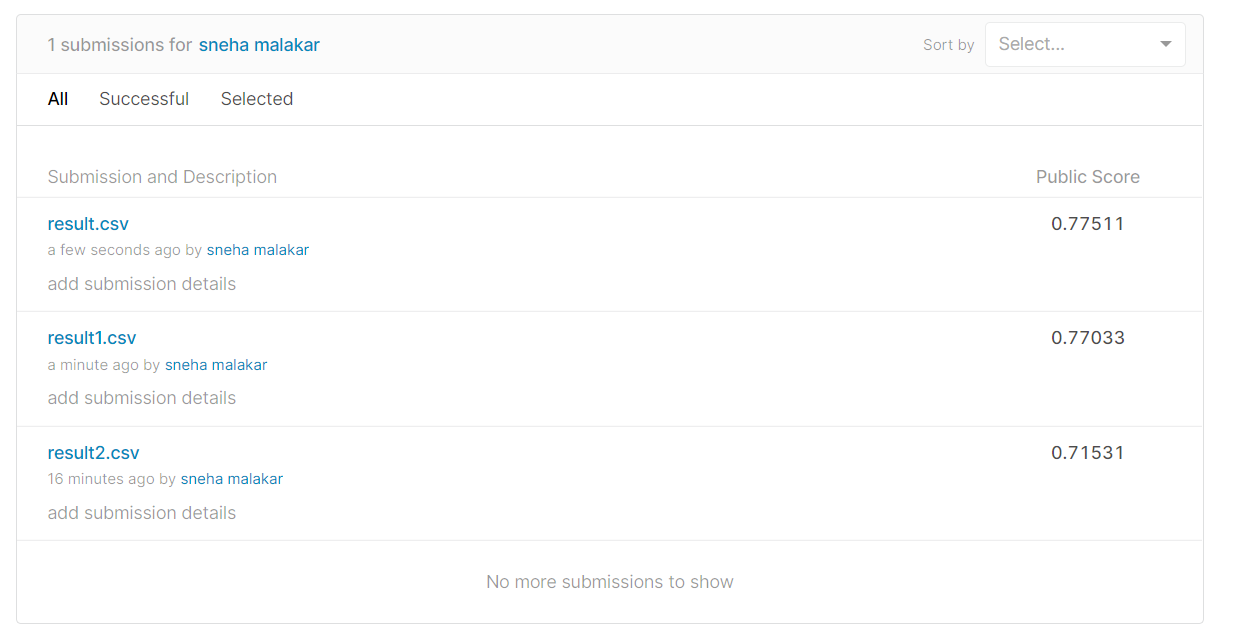